# Assigning additive DMS phenotypes to 10x data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
df = pd.read_csv("../nextflow/data/10x/filtered_contig_annotations.csv")
df

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,fwr3_nt,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id
0,AAACCTGAGAAGGTTT-1,True,AAACCTGAGAAGGTTT-1_contig_1,True,508,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,GGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCA...,CQQYNSYPLTF,TGTCAGCAATATAACAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,1846,73,clonotype1,clonotype1_consensus_2,168
1,AAACCTGAGAAGGTTT-1,True,AAACCTGAGAAGGTTT-1_contig_2,True,555,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,ACTTACTACAATCCATCTCTCAAAAGTCGAATCTCCATCACTCGAG...,CARDFDVW,TGTGCAAGGGACTTCGATGTCTGG,GAGTTVTVSS,GGCGCAGGGACCACGGTCACCGTCTCCTCAG,208,8,clonotype1,clonotype1_consensus_1,168
2,AAACCTGAGTGGAGAA-1,True,AAACCTGAGTGGAGAA-1_contig_1,True,508,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,GGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCA...,CQQYNRYPLTF,TGTCAACAATATAACAGGTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,1953,61,clonotype1,clonotype1_consensus_2,317
3,AAACCTGAGTGGAGAA-1,True,AAACCTGAGTGGAGAA-1_contig_2,True,551,IGH,IGHV3-8,NaN,IGHJ1,IGHG2B,...,ACTTACTACAATCCATCTCTCAAAAGTCGAATCTCCATCACTCGAG...,CARDFDVW,TGTGCAAGGGACTTCGATGTCTGG,GAGTTVTVSS,GGCGCAGGGACCACGGTCACCGTCTCCTCAG,217,9,clonotype1,clonotype1_consensus_1,317
4,AAACCTGCAATAGCAA-1,True,AAACCTGCAATAGCAA-1_contig_1,True,541,IGH,IGHV3-8,NaN,IGHJ1,IGHG2C,...,ACTTACTACAATCCATCTCTCAAAAGTCGAATCTCCATCACTCGAG...,CGRDFDVW,TGTGGAAGGGACTTCGATGTCTGG,GAGTTVTVSS,GGCGCAGGGACCACGGTCACCGTCTCCTCAG,96,4,clonotype1,clonotype1_consensus_1,4664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13485,TTTGTCAGTTCAGTAC-1,True,TTTGTCAGTTCAGTAC-1_contig_2,True,505,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,GGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCA...,CQQYYSYPLTF,TGTCAGCAATATTACAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,1958,57,clonotype1,clonotype1_consensus_2,18
13486,TTTGTCATCAGTTAGC-1,True,TTTGTCATCAGTTAGC-1_contig_1,True,512,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,GGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCA...,CHQYHSYPITF,TGTCACCAATATCACAGCTATCCTATCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,2157,64,clonotype1,clonotype1_consensus_2,4914
13487,TTTGTCATCCTGCTTG-1,True,TTTGTCATCCTGCTTG-1_contig_1,True,551,IGH,IGHV3-8,NaN,IGHJ1,IGHG2B,...,ACTTACTACAATCCATCTCTCAAAAGTCGAATCTCCATCACTCGAG...,CGRDFDVW,TGTGGAAGGGACTTCGATGTCTGG,GAGTTVTVSS,GGCGCAGGGACCACGGTCACCGTCTCCTCAG,241,11,clonotype1,clonotype1_consensus_1,4891
13488,TTTGTCATCGGAAATA-1,True,TTTGTCATCGGAAATA-1_contig_1,True,520,IGH,IGHV3-8,NaN,IGHJ1,IGHG2B,...,AGTTACTACAATCCATCTCTCAAAAGTCGAATCTCCATCACTCGAG...,CARDFDVW,TGTGCAAGGGACTTCGATGTCTGG,GAGTTVTVSS,GGCGCAGGGACCACGGTCACCGTCTCCTCTG,339,11,clonotype1,clonotype1_consensus_1,3178


### Barcode multiplicity

Most are multiplicity two, for paired heavy and light chains from single cells.

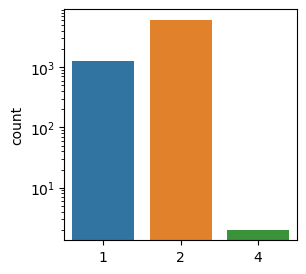

In [3]:
plt.figure(figsize=(3, 3))
sns.countplot(x=df.groupby("barcode").size())
plt.yscale("log")
plt.show()


## Load DMS data

In [4]:
dms_df = pd.read_csv("https://media.githubusercontent.com/media/jbloomlab/Ab-CGGnaive_DMS/main/results/final_variant_scores/final_variant_scores.csv", index_col="mutation", dtype=dict(position_IMGT=pd.Int16Dtype()))
# remove linker sites
dms_df = dms_df[dms_df.chain != "link"]
# add indicator for wildtype data
dms_df["WT"] = dms_df.wildtype == dms_df.mutant
assert dms_df.position_IMGT.max() < 1000
dms_df["site"] = [f"{chain}-{str(pos).zfill(3)}" for chain, pos in zip(dms_df.chain, dms_df.position_IMGT)]
dms_df

,target,wildtype,position,position_IMGT,chain,annotation,mutant,codon,single_nt,bind_CGG,...,expr,delta_expr,n_bc_expr,n_libs_expr,psr,delta_psr,n_bc_psr,n_libs_psr,WT,site
mutation,,,,,,,,,,,,,,,,,,,,,
E1(H)A,CGG_naive,E,1,1,H,FWRH1,A,GAG,True,10.48829,...,10.44614,-0.00453,19.0,2.0,6.78608,-0.07452,17.0,2.0,False,H-001
E1(H)C,CGG_naive,E,1,1,H,FWRH1,C,GAG,False,10.44477,...,10.32364,-0.12703,20.0,2.0,7.44234,0.58174,17.0,2.0,False,H-001
E1(H)D,CGG_naive,E,1,1,H,FWRH1,D,GAG,True,10.42771,...,10.51618,0.06551,16.0,2.0,6.95940,0.09880,13.0,2.0,False,H-001
E1(H)E,CGG_naive,E,1,1,H,FWRH1,E,GAG,True,10.45719,...,10.45067,0.00000,21170.0,2.0,6.86060,0.00000,18910.0,2.0,True,H-001
E1(H)F,CGG_naive,E,1,1,H,FWRH1,F,GAG,False,10.51899,...,10.33163,-0.11904,24.0,2.0,6.91372,0.05313,21.0,2.0,False,H-001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R128(L)S,CGG_naive,R,235,128,L,FWRL4,S,CGT,True,10.44756,...,10.54313,0.09246,39.0,2.0,6.93925,0.07866,33.0,2.0,False,L-128
R128(L)T,CGG_naive,R,235,128,L,FWRL4,T,CGT,False,10.43023,...,10.53860,0.08793,36.0,2.0,6.88956,0.02896,34.0,2.0,False,L-128
R128(L)V,CGG_naive,R,235,128,L,FWRL4,V,CGT,False,10.38231,...,10.48707,0.03640,27.0,2.0,6.78160,-0.07899,24.0,2.0,False,L-128


### Load naive sequence with IMGT numbering

In [5]:
pos_df = pd.read_csv("https://raw.githubusercontent.com/jbloomlab/Ab-CGGnaive_DMS/main/data/CGGnaive_sites.csv", dtype=dict(site=pd.Int16Dtype()), index_col="site_scFv")
pos_df

,amino_acid,chain,site,KI_codon,annotation
site_scFv,,,,,
1,E,H,1,GAG,FWRH1
2,V,H,2,GTG,FWRH1
3,Q,H,3,CAG,FWRH1
4,L,H,4,CTT,FWRH1
5,Q,H,5,CAG,FWRH1
...,...,...,...,...,...
231,L,L,124,CTA,FWRL4
232,E,L,125,GAA,FWRL4
233,I,L,126,ATA,FWRL4


In [6]:
naive_H = "".join(pos_df.query("chain == 'H'").amino_acid)
naive_H

'EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLEYMGYISYSGSTYYNPSLKSRISITRDTSKNQYYLQLNSVTTEDTATYYCARDFDVWGAGTTVTVSS'

In [7]:
# note extra R at end of scFv sequence, which we exclude below
naive_L = "".join(pos_df.query("chain == 'L'").amino_acid)[:-1]
naive_L

'DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKALIYSASYRYSGVPDRFTGSGSGTDFTLTISNVQSEDLAEYFCQQYNSYPLTFGSGTKLEIK'

### Add full length amino-acid sequence to the 10x data frame

In [8]:
df["aa_seq"] = df.fwr1 + df.cdr1 + df.fwr2 + df.cdr2 + df.fwr3 + df.cdr3 + df.fwr4

### Distribution of sequence lengths

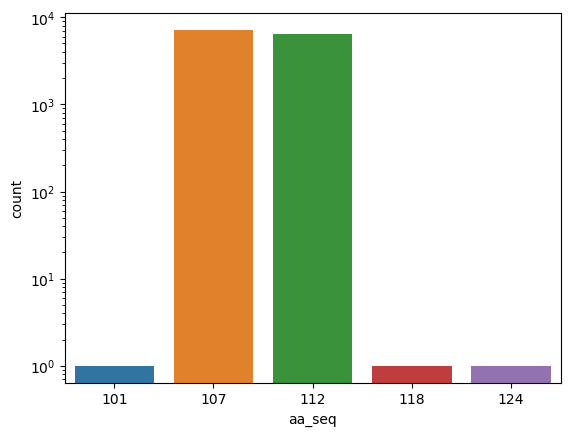

In [9]:
sns.countplot(x=df.aa_seq.str.len())
plt.yscale("log")

## Assign amino-acid mutations and additive phenotypes to 10x sequences

**Note**: we do not attempt to pair heavy and light chains from the same cell, so phenotypes are assigned to each chain independently.
Under an additive model, the values for each chain can be added to get the phenotype for the BCR

In [10]:
def get_mutations(naive_aa, aa, pos_map, chain_annotation):
    return [f"{aa1}{pos_map[pos]}{chain_annotation}{aa2}"
            for pos, (aa1, aa2) in enumerate(zip(naive_aa, aa))
            if aa1 != aa2]

In [11]:
pos_map_H = pos_df.loc[pos_df.chain == "H", "site"].reset_index(drop=True)
pos_map_L = pos_df.loc[pos_df.chain == "L", "site"].reset_index(drop=True)

In [12]:
for idx in df.index:
     if df.chain[idx] == "IGH" and len(df.aa_seq[idx]) == 112:
          mutations = get_mutations(naive_H, df.aa_seq[idx], pos_map_H, "(H)")          
     elif df.chain[idx] == "IGK" and len(df.aa_seq[idx]) == 107:
          mutations = get_mutations(naive_L, df.aa_seq[idx], pos_map_L, "(L)")
     else:
          print(f"skipping unexpected chain length {df.chain[idx]} {len(df.aa_seq[idx])}")
          continue

     df.loc[idx, "mutations"] = ",".join(mutations)
     df.loc[idx, "n_mutations"] = len(mutations)
     df.loc[idx, "delta_bind_CGG"] = dms_df.delta_bind_CGG[mutations].sum()
     df.loc[idx, "delta_expr"] = dms_df.delta_expr[mutations].sum()
     df.loc[idx, "delta_psr"] = dms_df.delta_psr[mutations].sum()

df.n_mutations = df.n_mutations.astype("Int64")

df

skipping unexpected chain length IGH 118
skipping unexpected chain length IGH 124
skipping unexpected chain length IGK 101


,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,aa_seq,mutations,n_mutations,delta_bind_CGG,delta_expr,delta_psr
0,AAACCTGAGAAGGTTT-1,True,AAACCTGAGAAGGTTT-1_contig_1,True,508,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,73,clonotype1,clonotype1_consensus_2,168,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWNQQKPGQSPKA...,Y42(L)N,1,0.12851,-1.22449,0.74010
1,AAACCTGAGAAGGTTT-1,True,AAACCTGAGAAGGTTT-1_contig_2,True,555,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,8,clonotype1,clonotype1_consensus_1,168,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,"S57(H)N,S64(H)T",2,-0.05295,-0.08240,-0.20198
2,AAACCTGAGTGGAGAA-1,True,AAACCTGAGTGGAGAA-1_contig_1,True,508,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,61,clonotype1,clonotype1_consensus_2,317,DIVMTQSQKFMSTSVGDRVSVTCKASQNVDTNLAWFQQKPGQSPKA...,"G36(L)D,V39(L)L,Y42(L)F,I54(L)L,S109(L)R",5,0.09596,-0.27115,-0.36752
3,AAACCTGAGTGGAGAA-1,True,AAACCTGAGTGGAGAA-1_contig_2,True,551,IGH,IGHV3-8,NaN,IGHJ1,IGHG2B,...,9,clonotype1,clonotype1_consensus_1,317,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,Y58(H)N,1,-0.08810,-0.00666,-0.31802
4,AAACCTGCAATAGCAA-1,True,AAACCTGCAATAGCAA-1_contig_1,True,541,IGH,IGHV3-8,NaN,IGHJ1,IGHG2C,...,4,clonotype1,clonotype1_consensus_1,4664,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNTLE...,"K49(H)T,A105(H)G",2,0.25335,-0.01026,-0.06262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13485,TTTGTCAGTTCAGTAC-1,True,TTTGTCAGTTCAGTAC-1_contig_2,True,505,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,57,clonotype1,clonotype1_consensus_2,18,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWCQQKPGQSPKA...,"Y42(L)C,N108(L)Y",2,0.76925,-0.42719,-0.22792
13486,TTTGTCATCAGTTAGC-1,True,TTTGTCATCAGTTAGC-1_contig_1,True,512,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,64,clonotype1,clonotype1_consensus_2,4914,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,"Q105(L)H,N108(L)H,L116(L)I",3,1.22943,0.15976,-0.20505
13487,TTTGTCATCCTGCTTG-1,True,TTTGTCATCCTGCTTG-1_contig_1,True,551,IGH,IGHV3-8,NaN,IGHJ1,IGHG2B,...,11,clonotype1,clonotype1_consensus_1,4891,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,"S59(H)N,S64(H)R,Y88(H)H,A105(H)G",4,-2.57039,-0.17854,-0.18635
13488,TTTGTCATCGGAAATA-1,True,TTTGTCATCGGAAATA-1_contig_1,True,520,IGH,IGHV3-8,NaN,IGHJ1,IGHG2B,...,11,clonotype1,clonotype1_consensus_1,3178,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,"I56(H)M,T65(H)S",2,-0.01158,0.01935,0.24656


## Write data frame to file

In [14]:
df.to_csv("output/10x/filtered_contig_annotations_dms_phenotypes.csv", index=False)